In [61]:
# if run in colab
from google.colab import drive
drive.mount('/content/drive')
cd drive/MyDrive/PubPulse
pwd
import sys
sys.path.append('/content/drive/MyDrive/PubPulse/lib')
sys.path.append('/content/drive/MyDrive/PubPulse/data')
sys.path.append('/content/drive/MyDrive/PubPulse/services')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
sys.path.append("..")
sys.path.append("../lib")
sys.path.append("../data")
sys.path.append("../services")
import importlib
import preproc as pre
importlib.reload(pre)
import search_service as search
importlib.reload(search)
import os
import pandas as pd

In [5]:
dataset = pre.make_dataset_from_txt('../data/extracted-text/')

In [6]:
len(dataset)

299

In [7]:
dataset.head()

,type,title,input,data_source
0,ABSTRACT,ABSTRACT,ABSTRACT\n Medicine relies on the use of pharm...,Emerging Frontiers in Drug Delivery.txt
1,TITLE_PARAGRAPH,INTRODUCTION,Medicine relies on the use of pharmacologicall...,Emerging Frontiers in Drug Delivery.txt
2,TITLE_PARAGRAPH,DRUG DELIVERY SYSTEMS FOR CONTROLLED,RELEASE One important class of DDS is controll...,Emerging Frontiers in Drug Delivery.txt
3,TITLE_PARAGRAPH,SYSTEMIC RNA DELIVERY,RNAs can manipulate gene expression through se...,Emerging Frontiers in Drug Delivery.txt
4,TITLE_PARAGRAPH,DRUG DELIVERY SYSTEMS FOR LOCALIZED THERAPY,One potential limitation to systemic administr...,Emerging Frontiers in Drug Delivery.txt


In [8]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 1. Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")

In [10]:
# 2. Tokenize each row and count the number of tokens
title_token_counts = [len(tokenizer.tokenize(title)) for title in dataset["title"]]
input_token_counts = [len(tokenizer.tokenize(input_text)) for input_text in dataset["input"]]
combined_token_counts = [title + input_text for title, input_text in zip(title_token_counts, input_token_counts)]


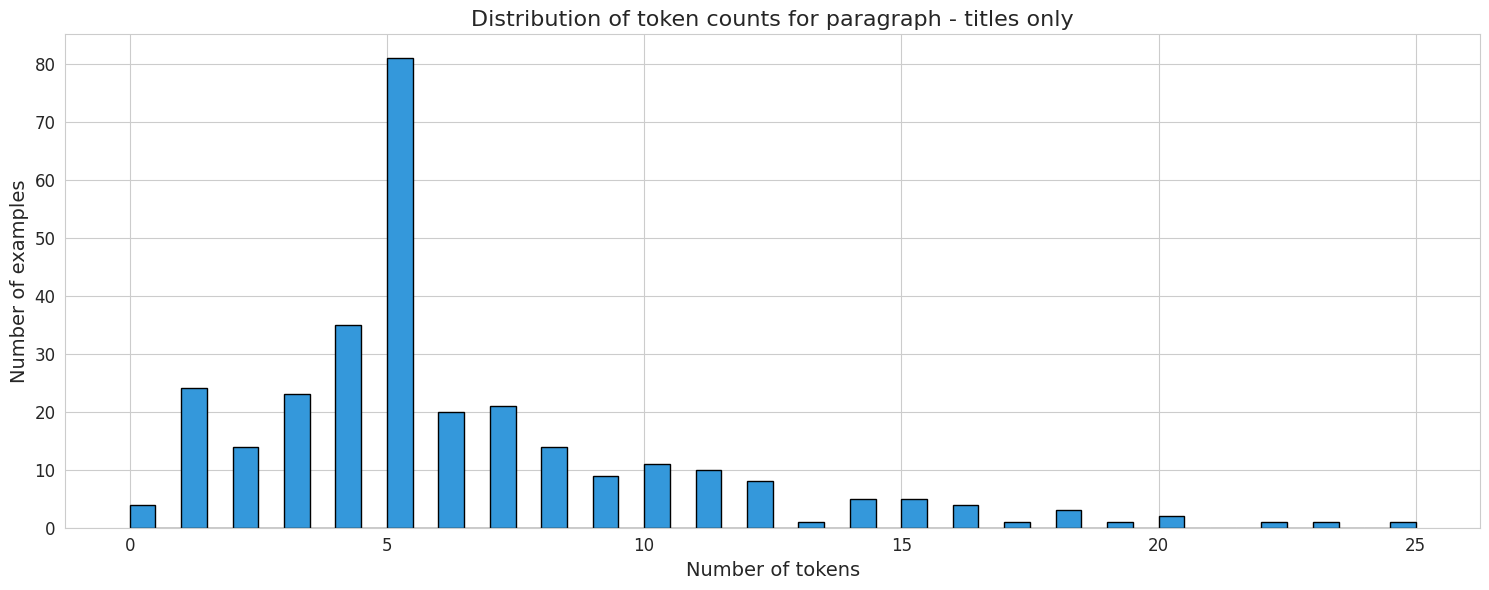

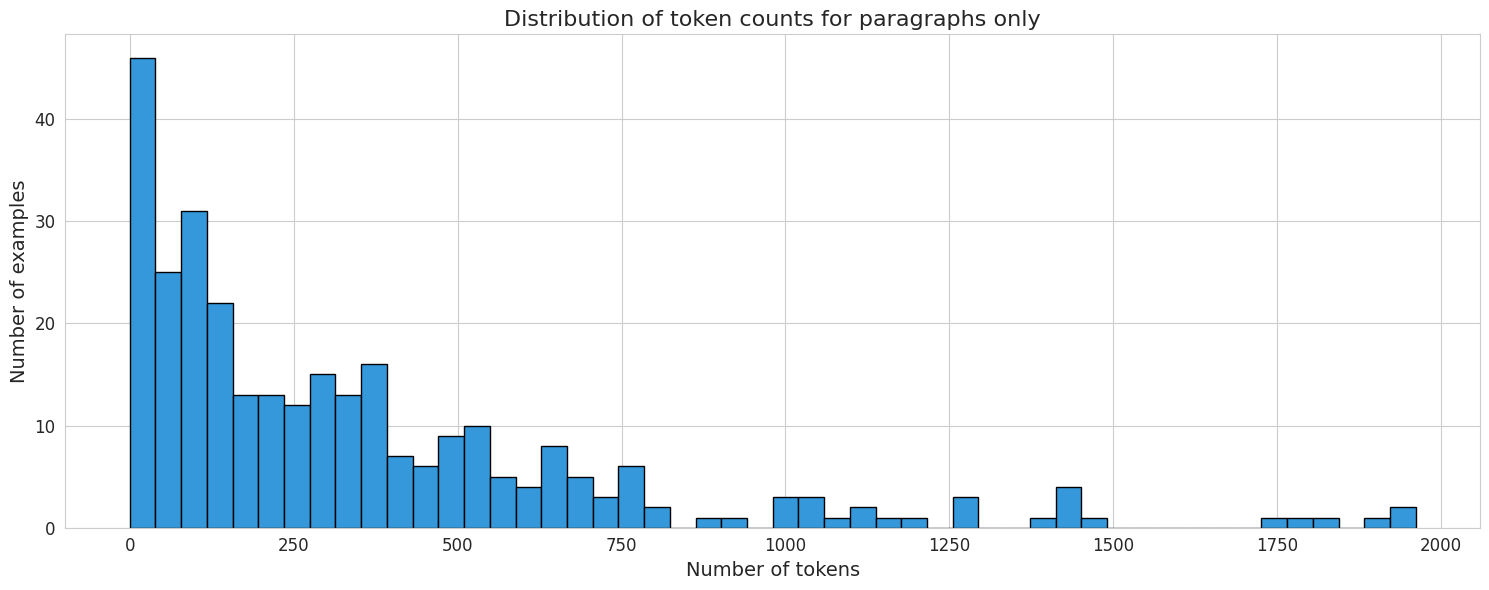

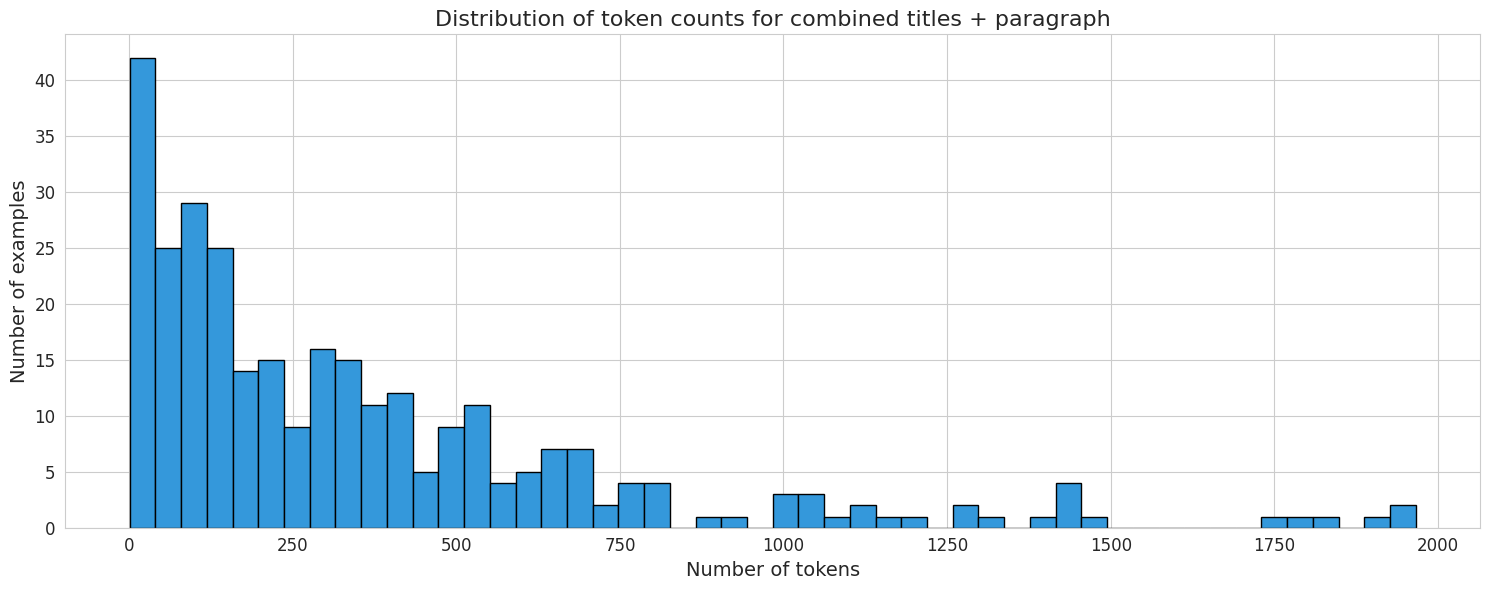

In [11]:
# Plot the distribution of token counts
pre.plot_token_distribution(title_token_counts,
                  "Distribution of token counts for paragraph - titles only")
pre.plot_token_distribution(input_token_counts,
                  "Distribution of token counts for paragraphs only")
pre.plot_token_distribution(combined_token_counts,
                  "Distribution of token counts for combined titles + paragraph")

Max context size of Llama 2 by default = 4096 tokens, meaning we are on the safe side since we don't exceed this number.

## Check Near-deduplication using embeddings

In [12]:
# !pip install -q datasets transformers sentence_transformers faiss-gpu

In [13]:
deduped_df = pre.deduplicate_dataframe(dataset,
                                   "sentence-transformers/all-MiniLM-L6-v2", 0.95)

Converting text to embeddings...


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Filtering out near-duplicates...


Filtering:   0%|          | 0/299 [00:00<?, ?it/s]

In [14]:
importlib.reload(search)
similar_papers_df = search.engine(dataset,
                                  "sentence-transformers/all-MiniLM-L6-v2")

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy

/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy

/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy

/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy

/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy

/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy

/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy

/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_papers.loc[similar_indices, 'score'] = similar_distances
/home/mezcla/Documents/pubpulse/notebooks/../services/search_service.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [15]:
similar_papers_df.head()

,input_paragraph,input_paper,similar_papers,scores
0,Medicine relies on the use of pharmacologicall...,Emerging Frontiers in Drug Delivery.txt,[],[]
1,RELEASE One important class of DDS is controll...,Emerging Frontiers in Drug Delivery.txt,[],[]
2,RNAs can manipulate gene expression through se...,Emerging Frontiers in Drug Delivery.txt,"[PMC8325057.txt, s41591-022-02061-1.txt, mRNA ...","[0.6276384592056274, 0.6076517105102539, 0.605..."
3,One potential limitation to systemic administr...,Emerging Frontiers in Drug Delivery.txt,[82_2020_217.txt],[0.5294034481048584]
4,Oral ingestion remains the preferred route for...,Emerging Frontiers in Drug Delivery.txt,[],[]


In [16]:
dataset.head()

,type,title,input,data_source
0,ABSTRACT,ABSTRACT,ABSTRACT\n Medicine relies on the use of pharm...,Emerging Frontiers in Drug Delivery.txt
1,TITLE_PARAGRAPH,INTRODUCTION,Medicine relies on the use of pharmacologicall...,Emerging Frontiers in Drug Delivery.txt
2,TITLE_PARAGRAPH,DRUG DELIVERY SYSTEMS FOR CONTROLLED,RELEASE One important class of DDS is controll...,Emerging Frontiers in Drug Delivery.txt
3,TITLE_PARAGRAPH,SYSTEMIC RNA DELIVERY,RNAs can manipulate gene expression through se...,Emerging Frontiers in Drug Delivery.txt
4,TITLE_PARAGRAPH,DRUG DELIVERY SYSTEMS FOR LOCALIZED THERAPY,One potential limitation to systemic administr...,Emerging Frontiers in Drug Delivery.txt


In [17]:
combined_text = ' '.join(dataset[(dataset.data_source == 'Emerging Frontiers in Drug Delivery.txt') &\
                                  (dataset.type != 'ABSTRACT')].input.tolist())


In [18]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", 
                model="NousResearch/Yarn-Llama-2-7b-64k")

2023-11-29 18:10:16.188908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 18:10:16.832677: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-29 18:10:16.832743: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [19]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

# tokenizer = AutoTokenizer.from_pretrained("NousResearch/Yarn-Llama-2-70b-32k")
model = AutoModelForCausalLM.from_pretrained("NousResearch/Yarn-Llama-2-70b-32k")

ValueError: `rope_scaling` must be a dictionary with with two fields, `type` and `factor`, got {'factor': 8.0, 'finetuned': True, 'original_max_position_embeddings': 4096, 'type': 'yarn'}

In [27]:
from llama_cpp import Llama
llm = Llama(model_path="./models/7B/llama-model.gguf")
output = llm(
      "Q: Create a summary of this {}. Summary: ", # Prompt
      max_tokens=100, # Generate up to 32 tokens
      stop=["Q:", "\n"], # Stop generating just before the model would generate a new question
      echo=True # Echo the prompt back in the output
).format(combined_text) # Generate a completion, can also call create_completion

ValueError: Model path does not exist: ./models/7B/llama-model.gguf

In [20]:
def load_model(device_type, model_id, model_basename=None):
    logging.info(f"Loading Model: {model_id}, on: {device_type}")
    logging.info("This action can take a few minutes!")

    if model_basename is not None:
        if ".ggml" in model_basename:
            logging.info("Using Llamacpp for GGML quantized models")
            model_path = hf_hub_download(repo_id=model_id, filename=model_basename)
            max_ctx_size = 4096
            kwargs = {
                "model_path": model_path,
                "n_ctx": max_ctx_size,
                "max_tokens": max_ctx_size,
            }
            if device_type.lower() == "mps":
                kwargs["n_gpu_layers"] = 1000
            if device_type.lower() == "cuda":
                kwargs["n_gpu_layers"] = 1000
                kwargs["n_batch"] = max_ctx_size
            return LlamaCpp(**kwargs)

        else:
            logging.info("Using AutoGPTQForCausalLM for quantized models")

            if ".safetensors" in model_basename:
                # Remove the ".safetensors" ending if present
                model_basename = model_basename.replace(".safetensors", "")

            tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)
            logging.info("Tokenizer loaded")

            model = AutoGPTQForCausalLM.from_quantized(
                model_id,
                model_basename=model_basename,
                use_safetensors=True,
                trust_remote_code=True,
                device="cuda:0",
                use_triton=False,
                quantize_config=None,
            )

    elif device_type.lower() == "cuda":  
        logging.info("Using AutoModelForCausalLM for full models")
        tokenizer = AutoTokenizer.from_pretrained(model_id)
        logging.info("Tokenizer loaded")

        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            device_map="auto",
            torch_dtype=torch.float16,
            low_cpu_mem_usage=True,
            trust_remote_code=True,
            # max_memory={0: "15GB"} # Uncomment this line if you encounter CUDA out of memory errors
        )
        model.tie_weights()

    else:
        logging.info("Using LlamaTokenizer")
        tokenizer = LlamaTokenizer.from_pretrained(model_id)
        model = LlamaForCausalLM.from_pretrained(model_id)

    generation_config = GenerationConfig.from_pretrained(model_id)

    # Create a pipeline for text generation
    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        max_length=2048,
        temperature=0,
        top_p=0.95,
        repetition_penalty=1.15,
        generation_config=generation_config,
    )

    local_llm = HuggingFacePipeline(pipeline=pipe)
    logging.info("Local LLM Loaded")

    return local_llm


In [21]:
import torch
import logging
from huggingface_hub import hf_hub_download
DEVICE_TYPE = "cuda" if torch.cuda.is_available() else "cpu"
SHOW_SOURCES = True
logging.info(f"Running on: {DEVICE_TYPE}")
logging.info(f"Display Source Documents set to: {SHOW_SOURCES}")

In [22]:
model_id = "TheBloke/Llama-2-7B-Chat-GGML"
model_basename = "llama-2-7b-chat.ggmlv3.q4_0.bin"

In [23]:
LLM = load_model(device_type=DEVICE_TYPE, 
                 model_id=model_id, 
                 model_basename=model_basename)

NameError: name 'LlamaCpp' is not defined

In [ ]:
def generate_summary(text_chunk):
    # Defining the template to generate summary
    template = """
    Write a concise summary of the text, return your responses with 10 lines that cover the key points of the text.
    ```{text}```
    SUMMARY:
    """
    prompt = PromptTemplate(template=template, 
                            input_variables=["text"])
    llm_chain = LLMChain(prompt=prompt, llm=LLM)

    summary = llm_chain.run(text_chunk)
    return summary

In [3]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="austinm2151/Llama2_Summarizer")

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates